# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [111]:
#Import dependences
import pandas as pd
import json
import matplotlib.pyplot as plt
import random
from citipy import citipy
import numpy as np
import requests
import time
import sys
from pprint import pprint
from scipy.stats import linregress
#!pip install sklearn
from sklearn import datasets
from weather_config import weather_api_key

## Generate Cities List

In [112]:
#Step1: Need random latitude and longitude values to feed to citipy

#Create lists and add random latitude and longitude values
np.random.seed(672812)
long_list = [random_long for random_long in np.random.randint(-180,180,1500)]
# print(len(long_list))
lat_list = [random_lat for random_lat in np.random.randint(-90,90,1500)]
# print(len(lat_list))

#Feed random latitude and longitude values to citipy
cities = []
index_max = len(lat_list)
#index_max
for index in range(0,index_max):
    lat_value = lat_list[index]
    #print(lat_value)
    long_value = long_list[index]
    #print(long_value)
    city = citipy.nearest_city(lat_value,long_value)
    city_name = city.city_name
    
    if city_name not in cities:
        cities.append(city_name)
# print(cities, '\n', len(cities))





### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [113]:
#Define the base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?q="

In [114]:
#Set empty lists for appending the results to
lat_list_api = []
long_list_api = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
found_cities = []
all_cities_data = []

#Loop through the cities previously found from citipy
for city_index in range(0, len(cities)):
    city_name = cities[city_index]
    print(f'Processing city # {city_index} | City name = {city_name}.')
    print('-----------------------------------------------------------------')
    
    try: 
        #API request
        query_url = f'{base_url}{city_name}&appid={weather_api_key}'
        response = requests.get(query_url).json()
        
        #Parse response
        lat = response['coord']['lat']
        long = response['coord']['lon']
        max_temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        cloudiness = response['clouds']['all']
        wind_speed = response['wind']['speed']
        country = response['sys']['country']
        date = response['dt']
     
        #Append to lists
        date_list.append(date)
        lat_list_api.append(lat)
        long_list_api.append(long)
        country_list.append(country)
        max_temp_list.append(max_temp)
        humidity_list.append(humidity)
        wind_speed_list.append(wind_speed)
        cloudiness_list.append(cloudiness)
        found_cities.append(city_name)   
       
        #Append to dictionary
        all_cities_data.append({"City": city_name,
                        "Lat": lat,
                        "Long": long,
                        "Max Temp": max_temp,
                        "Humidity": humidity,
                        "Cloudiness": cloudiness,
                        "Wind Speed": wind_speed,
                        "Country": country,
                        "Date": date})
    
    except :
        #if exception in the API request
        print(f'City {city_name} is not found.')
        #print(sys.exc_info()[0])
        print('-----------------------------------------------------------------') 
    time.sleep(1)
    

Processing city # 0 | City name = cidreira.
-----------------------------------------------------------------
Processing city # 1 | City name = hermanus.
-----------------------------------------------------------------
Processing city # 2 | City name = rikitea.
-----------------------------------------------------------------
Processing city # 3 | City name = harper.
-----------------------------------------------------------------
Processing city # 4 | City name = oksfjord.
-----------------------------------------------------------------
Processing city # 5 | City name = margate.
-----------------------------------------------------------------
Processing city # 6 | City name = barvinkove.
-----------------------------------------------------------------
Processing city # 7 | City name = severo-kurilsk.
-----------------------------------------------------------------
Processing city # 8 | City name = arraial do cabo.
-----------------------------------------------------------------

Processing city # 70 | City name = college.
-----------------------------------------------------------------
Processing city # 71 | City name = sept-iles.
-----------------------------------------------------------------
Processing city # 72 | City name = provideniya.
-----------------------------------------------------------------
Processing city # 73 | City name = yanam.
-----------------------------------------------------------------
Processing city # 74 | City name = hofn.
-----------------------------------------------------------------
Processing city # 75 | City name = saleaula.
-----------------------------------------------------------------
City saleaula is not found.
-----------------------------------------------------------------
Processing city # 76 | City name = jishou.
-----------------------------------------------------------------
Processing city # 77 | City name = flinders.
-----------------------------------------------------------------
Processing city # 78 | C

Processing city # 141 | City name = caravelas.
-----------------------------------------------------------------
Processing city # 142 | City name = nouadhibou.
-----------------------------------------------------------------
Processing city # 143 | City name = ixtapa.
-----------------------------------------------------------------
Processing city # 144 | City name = garmsar.
-----------------------------------------------------------------
Processing city # 145 | City name = dingle.
-----------------------------------------------------------------
Processing city # 146 | City name = tokur.
-----------------------------------------------------------------
Processing city # 147 | City name = vestbygda.
-----------------------------------------------------------------
City vestbygda is not found.
-----------------------------------------------------------------
Processing city # 148 | City name = londoko.
-----------------------------------------------------------------
Processing cit

Processing city # 213 | City name = ostrovnoy.
-----------------------------------------------------------------
Processing city # 214 | City name = maxixe.
-----------------------------------------------------------------
Processing city # 215 | City name = barentsburg.
-----------------------------------------------------------------
City barentsburg is not found.
-----------------------------------------------------------------
Processing city # 216 | City name = kokoda.
-----------------------------------------------------------------
Processing city # 217 | City name = fort nelson.
-----------------------------------------------------------------
Processing city # 218 | City name = buckeye.
-----------------------------------------------------------------
Processing city # 219 | City name = port alfred.
-----------------------------------------------------------------
Processing city # 220 | City name = najran.
-----------------------------------------------------------------
Proc

Processing city # 279 | City name = tasiilaq.
-----------------------------------------------------------------
Processing city # 280 | City name = puerto madryn.
-----------------------------------------------------------------
Processing city # 281 | City name = aleksandrovsk-sakhalinskiy.
-----------------------------------------------------------------
Processing city # 282 | City name = sarkand.
-----------------------------------------------------------------
Processing city # 283 | City name = sakakah.
-----------------------------------------------------------------
Processing city # 284 | City name = beira.
-----------------------------------------------------------------
Processing city # 285 | City name = cape coast.
-----------------------------------------------------------------
Processing city # 286 | City name = bathsheba.
-----------------------------------------------------------------
Processing city # 287 | City name = tura.
-----------------------------------------

Processing city # 351 | City name = anadyr.
-----------------------------------------------------------------
Processing city # 352 | City name = iskateley.
-----------------------------------------------------------------
Processing city # 353 | City name = muncar.
-----------------------------------------------------------------
Processing city # 354 | City name = tiznit.
-----------------------------------------------------------------
Processing city # 355 | City name = boralday.
-----------------------------------------------------------------
Processing city # 356 | City name = saldanha.
-----------------------------------------------------------------
Processing city # 357 | City name = damietta.
-----------------------------------------------------------------
Processing city # 358 | City name = chlum u trebone.
-----------------------------------------------------------------
Processing city # 359 | City name = sorvag.
----------------------------------------------------------

Processing city # 420 | City name = waipawa.
-----------------------------------------------------------------
Processing city # 421 | City name = taltal.
-----------------------------------------------------------------
Processing city # 422 | City name = altamont.
-----------------------------------------------------------------
Processing city # 423 | City name = puerto escondido.
-----------------------------------------------------------------
Processing city # 424 | City name = ofaqim.
-----------------------------------------------------------------
Processing city # 425 | City name = abonnema.
-----------------------------------------------------------------
Processing city # 426 | City name = lere.
-----------------------------------------------------------------
Processing city # 427 | City name = jatiroto.
-----------------------------------------------------------------
Processing city # 428 | City name = kazalinsk.
----------------------------------------------------------

Processing city # 489 | City name = inhambane.
-----------------------------------------------------------------
Processing city # 490 | City name = seybaplaya.
-----------------------------------------------------------------
Processing city # 491 | City name = kautokeino.
-----------------------------------------------------------------
Processing city # 492 | City name = deputatskiy.
-----------------------------------------------------------------
Processing city # 493 | City name = dergachi.
-----------------------------------------------------------------
Processing city # 494 | City name = los llanos de aridane.
-----------------------------------------------------------------
Processing city # 495 | City name = mogadishu.
-----------------------------------------------------------------
Processing city # 496 | City name = turbat.
-----------------------------------------------------------------
Processing city # 497 | City name = aflu.
------------------------------------------

Processing city # 558 | City name = luderitz.
-----------------------------------------------------------------
Processing city # 559 | City name = oyo.
-----------------------------------------------------------------
Processing city # 560 | City name = mount gambier.
-----------------------------------------------------------------
Processing city # 561 | City name = shaoguan.
-----------------------------------------------------------------
Processing city # 562 | City name = shakiso.
-----------------------------------------------------------------
Processing city # 563 | City name = vila velha.
-----------------------------------------------------------------
Processing city # 564 | City name = picota.
-----------------------------------------------------------------
Processing city # 565 | City name = high level.
-----------------------------------------------------------------
Processing city # 566 | City name = tyrma.
------------------------------------------------------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [115]:
#Create dataframe from dictionary
city_info_df = pd.DataFrame(all_cities_data)
city_info_df['Max Temp (F)'] = [((temp-273.15)*(9/5)+32) for temp in city_info_df['Max Temp']]
city_info_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (F)
0,cidreira,-30.1811,-50.2056,281.15,59,4,7.96,BR,1627441397,46.400
1,hermanus,-34.4187,19.2345,284.21,66,99,5.46,ZA,1627441399,51.908
2,rikitea,-23.1203,-134.9692,296.60,79,100,6.84,PF,1627441318,74.210
3,harper,4.3750,-7.7169,297.69,75,100,3.32,LR,1627441401,76.172
4,oksfjord,70.2396,22.3479,284.26,87,25,2.14,NO,1627441402,51.998


In [146]:
city_info_df.to_csv("API_Weather_Data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [117]:
humidity_GT_100 = city_info_df.loc[city_info_df['Humidity']>100]

In [118]:
#  Get the indices of cities that have humidity over 100%.
indices = city_info_df.loc[city_info_df['Humidity']>100]
#indices

In [119]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

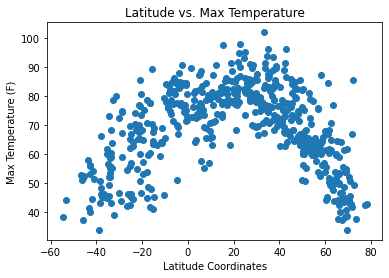

In [120]:
lat_plot = city_info_df['Lat']
temp_plot = city_info_df['Max Temp (F)']
plt.scatter(lat_plot, temp_plot)
plt.xlabel("Latitude Coordinates")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperature")
plt.savefig('latitude_temperature_scatter.png', bbox_inches='tight')
plt.show()

#Analysis: By plotting the max temperature against the latitude coordinates, the scatter plot is showing the distribution of the city temperatures based upon the location of the city from the equator; cities closer to the equator, have higher max temperatures.
#The plot indicates there is higher correlation for the northern hemisphere versus the southern hemisphere. 

## Latitude vs. Humidity Plot

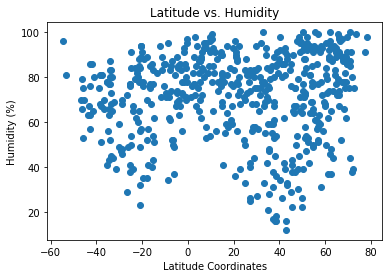

In [121]:
lat_plot = city_info_df['Lat']
humidity_plot = city_info_df['Humidity']
plt.scatter(lat_plot, humidity_plot)
plt.xlabel("Latitude Coordinates")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
plt.savefig('latitude_humidity_scatter.png', bbox_inches='tight')
plt.show()
#Analysis: By plotting the humidity against the latitude coordinates, the scatter plot is showing the majority of cities have humidity above 60%. 
#There is greater clustering around higher latitudes (above 40 degrees N) and humidity above 80%. 

## Latitude vs. Cloudiness Plot

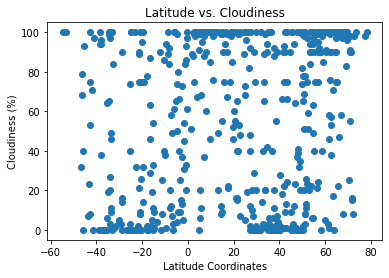

In [135]:
lat_plot = city_info_df['Lat']
cloudiness_plot = city_info_df['Cloudiness']
plt.scatter(lat_plot,cloudiness_plot)
plt.xlabel("Latitude Coordinates")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")
plt.savefig('latitude_cloudiness_scatter.png', bbox_inches='tight')
plt.show()
#Analysis: By plotting the cloudiness against the latitude coordinates, the scatter plot is indicating that cloudiness reaches a low value immediately south of and north of the equator; cloudness rises sharply near the equator. 

## Latitude vs. Wind Speed Plot

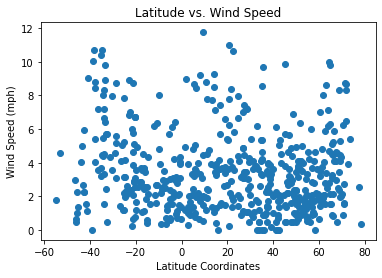

In [134]:
lat_plot = city_info_df['Lat']
wind_speed_plot = city_info_df['Wind Speed']
plt.scatter(lat_plot, wind_speed_plot)
plt.xlabel("Latitude Coordinates")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed")
plt.savefig('latitude_windspeed_scatter.png', bbox_inches='tight')
plt.show()
#Analysis: By plotting the wind speed against the latitude coordinates, the scatter plot seems to indicate that wind speed is not correlated with latitude value.

## Linear Regression

In [136]:
#Northern hemisphere
northern_hempisphere_df = city_info_df.loc[city_info_df['Lat'] >= 0]
northern_hempisphere_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (F)
3,harper,4.3750,-7.7169,297.69,75,100,3.32,LR,1627441401,76.172
4,oksfjord,70.2396,22.3479,284.26,87,25,2.14,NO,1627441402,51.998
5,margate,51.3813,1.3862,290.54,88,100,1.79,GB,1627441404,63.302
6,barvinkove,48.9097,37.0205,292.53,71,0,2.20,UA,1627441405,66.884
7,severo-kurilsk,50.6789,156.1250,288.67,88,100,3.12,RU,1627441407,59.936


In [137]:
#Southern hemisphere
southern_hempisphere_df = city_info_df.loc[city_info_df['Lat'] < 0]
southern_hempisphere_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (F)
0,cidreira,-30.1811,-50.2056,281.15,59,4,7.96,BR,1627441397,46.400
1,hermanus,-34.4187,19.2345,284.21,66,99,5.46,ZA,1627441399,51.908
2,rikitea,-23.1203,-134.9692,296.60,79,100,6.84,PF,1627441318,74.210
8,arraial do cabo,-22.9661,-42.0278,294.38,84,0,8.91,BR,1627441408,70.214
9,cape town,-33.9258,18.4232,284.33,87,20,1.54,ZA,1627441023,52.124


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

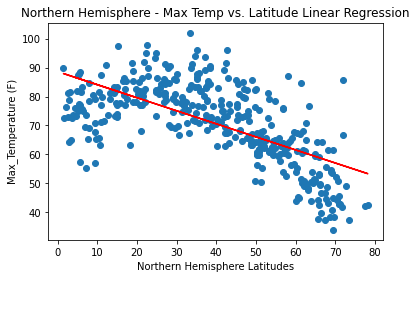

In [138]:
x_values = northern_hempisphere_df['Lat']
y_values = northern_hempisphere_df['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Northern Hemisphere Latitudes")
plt.ylabel("Max_Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig('NH_latitude_temperature_regression.png', bbox_inches='tight')
plt.show()
#Analysis: 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

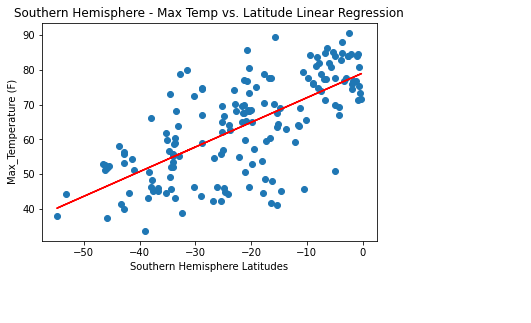

In [139]:
x_values = southern_hempisphere_df['Lat']
y_values = southern_hempisphere_df['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Southern Hemisphere Latitudes")
plt.ylabel("Max_Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig('SH_latitude_temperature_regression.png', bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

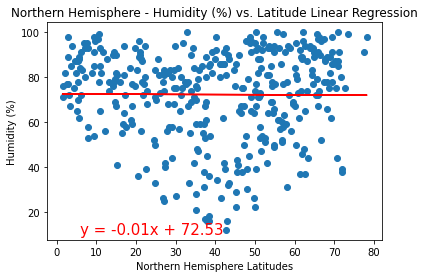

In [140]:
x_values = northern_hempisphere_df['Lat']
y_values = northern_hempisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Northern Hemisphere Latitudes")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig('NH_latitude_humidity_regression.png', bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

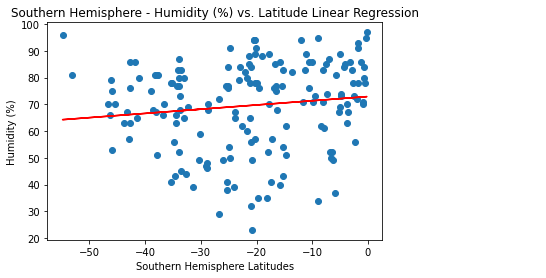

In [141]:
x_values = southern_hempisphere_df['Lat']
y_values = southern_hempisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Southern Hemisphere Latitudes")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig('SH_latitude_humidity_regression.png', bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

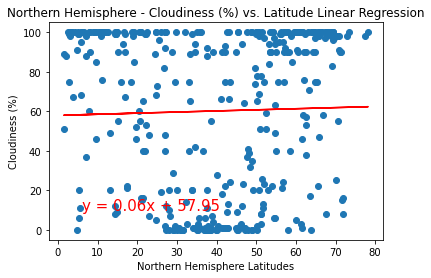

In [142]:
x_values = northern_hempisphere_df['Lat']
y_values = northern_hempisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Northern Hemisphere Latitudes")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig('NH_latitude_cloudiness_regression.png', bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

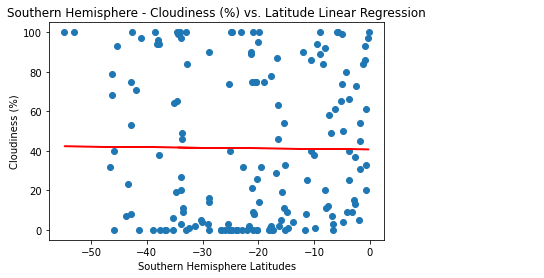

In [143]:
x_values = southern_hempisphere_df['Lat']
y_values = southern_hempisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Southern Hemisphere Latitudes")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig('SH_latitude_cloudiness_regression.png', bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

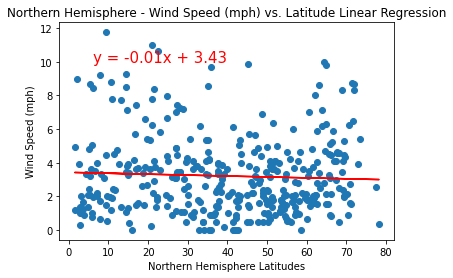

In [144]:
x_values = northern_hempisphere_df['Lat']
y_values = northern_hempisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Northern Hemisphere Latitudes")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig('NH_latitude_windspeed_regression.png', bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

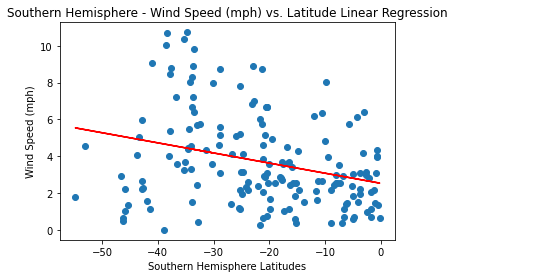

In [145]:
x_values = southern_hempisphere_df['Lat']
y_values = southern_hempisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Southern Hemisphere Latitudes")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig('SH_latitude_windspeed_regression.png', bbox_inches='tight')
plt.show()